<a href="https://colab.research.google.com/github/sureshvyas/stats_proj/blob/master/PCA_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
file=files.upload()


Saving Poverty.xls to Poverty.xls


In [91]:
data = pd.read_excel(io.BytesIO(file['Poverty.xls']))
data.head()


,BirthRt,DeathRt,InfMort,LExpM,LExpF,GNP,Region,Country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.9,*,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary


In [95]:
target=data['Region']
target

0     1
1     1
2     1
3     1
4     1
     ..
92    6
93    6
94    6
95    6
96    6
Name: Region, Length: 97, dtype: int64

In [96]:
data=data.drop(['GNP','Region','Country'],axis=1)
data.head()

,BirthRt,DeathRt,InfMort,LExpM,LExpF
0,24.7,5.7,30.8,69.6,75.5
1,12.5,11.9,14.4,68.3,74.7
2,13.4,11.7,11.3,71.8,77.7
3,12.0,12.4,7.6,69.8,75.9
4,11.6,13.4,14.8,65.4,73.8


In [97]:
len(data)

97

In [98]:
plt.style.use('ggplot')
# data.plot(kind='bar',)
# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.show

In [99]:
data.isnull().sum()

BirthRt    0
DeathRt    0
InfMort    0
LExpM      0
LExpF      0
dtype: int64

In [68]:
# X=df['WEIGHT']-np.mean(df['WEIGHT'])
# Y=df['PRICE']-np.mean(df['PRICE'])

# print(X,'\n',Y)

In [69]:
# cova_x_x=sum(X*X)/(len(df)-1)
# cova_x_y=sum(X*Y)/(len(df)-1)
# cova_y_x=sum(Y*X)/(len(df)-1)
# cova_y_y=sum(Y*Y)/(len(df)-1)

In [70]:
# cov_mat=np.array([[cova_x_x ,cova_x_y],[cova_y_x, cova_y_y]])
# cov_mat

In [100]:
np.cov(data)

array([[ 905.923 ,  928.1405,  984.7765, ...,  283.9805,  263.937 ,
         477.9635],
       [ 928.1405, 1034.988 , 1104.564 , ...,  101.853 ,   77.8695,
         353.146 ],
       [ 984.7765, 1104.564 , 1181.227 , ...,   80.7715,   59.3785,
         357.283 ],
       ...,
       [ 283.9805,  101.853 ,   80.7715, ...,  600.433 ,  573.1495,
         503.811 ],
       [ 263.937 ,   77.8695,   59.3785, ...,  573.1495,  556.063 ,
         483.1865],
       [ 477.9635,  353.146 ,  357.283 , ...,  503.811 ,  483.1865,
         499.452 ]])

In [101]:
data.corr()

,BirthRt,DeathRt,InfMort,LExpM,LExpF
BirthRt,1.000000,0.486197,0.858353,-0.866519,-0.894414
DeathRt,0.486197,1.000000,0.654623,-0.733467,-0.693033
InfMort,0.858353,0.654623,1.000000,-0.936838,-0.955352
LExpM,-0.866519,-0.733467,-0.936838,1.000000,0.982558
LExpF,-0.894414,-0.693033,-0.955352,0.982558,1.000000


In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(data)


In [118]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
dim_2=pca.fit_transform(df)



In [119]:
pca.explained_variance_ratio_

array([0.85165929, 0.10989742])

In [104]:
eig_val,eig_vec=np.linalg.eig(cov_mat)
eig_vec[:5]

array([[-0.24039581, -0.90651849,  0.19088988, -0.28186828,  0.06553224,
        -0.01584093],
       [-0.06181427,  0.10481422, -0.64024554, -0.74721237, -0.1293586 ,
        -0.01478649],
       [-0.92626913,  0.30821425,  0.20691675, -0.0598143 ,  0.01115931,
         0.02264187],
       [ 0.18402076,  0.15440997,  0.56300794, -0.37352709, -0.5416222 ,
        -0.43867856],
       [ 0.21455026,  0.20391177,  0.44027033, -0.45944437,  0.47703976,
         0.52905024]])

In [105]:
print(eig_val)

[2.45901891e+03 4.89054703e+01 2.04335032e+01 5.83589903e+00
 1.88082995e+00 9.69419994e-01]


In [106]:
eig_pair=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]
# for i in range(len(eig_val)):
#     eig_

In [107]:
for i in eig_pair:
    print(i[0])

2459.018908162714
48.90547030562107
20.433503226433025
5.835899026977943
1.8808299548397702
0.9694199935210763


In [108]:
explained_variances = []
for i in range(len(eig_val)):
    explained_variances.append((eig_val[i] / np.sum(eig_val))*100)
 
print(np.sum(explained_variances), '\n', explained_variances)

99.99999999999999 
 [96.92456569282385, 1.9276555595569904, 0.8054059361766749, 0.2300275027326393, 0.07413469896866506, 0.03821060974117285]


In [110]:
new_df=pd.DataFrame(dim_2,columns=['pc1','pc2'])


In [111]:
new_df

,pc1,pc2
0,-1.614601,-0.642477
1,-1.583214,0.985383
2,-1.907376,0.954672
3,-1.756204,1.127913
4,-1.304839,1.286708
...,...,...
92,2.778811,-0.183403
93,2.469744,-0.412663
94,2.186271,-0.146567
95,2.341340,-0.435579


In [121]:
[new_df['pc1'],new_df['pc2']]

[0    -1.614601
 1    -1.583214
 2    -1.907376
 3    -1.756204
 4    -1.304839
         ...   
 92    2.778811
 93    2.469744
 94    2.186271
 95    2.341340
 96    0.987251
 Name: pc1, Length: 97, dtype: float64, 0    -0.642477
 1     0.985383
 2     0.954672
 3     1.127913
 4     1.286708
         ...   
 92   -0.183403
 93   -0.412663
 94   -0.146567
 95   -0.435579
 96   -0.628389
 Name: pc2, Length: 97, dtype: float64]

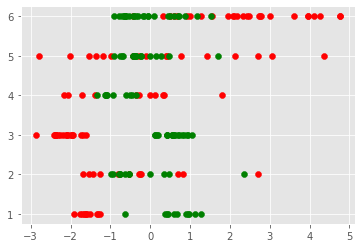

In [123]:
plt.scatter(new_df['pc1'], target,c='r')
plt.scatter(new_df['pc2'], target,c='g')

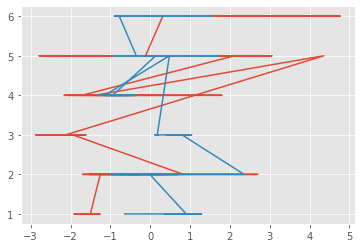

In [125]:
plt.plot(new_df['pc1'],target,new_df['pc2'],target)
# plt.plot(new_df['pc2'],target)